In [1]:
import numpy as np
from nltk.tree import Tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from iparse import IParser

In [2]:
def show_tree_and_pred(sent):
    tree2, cats = iparse.parse_sentence(sent)
    display(tree2)
    print(cats)
    tags = iparse.tree_to_tag(tree2)
    print(tags)
    display(iparse.tree_from_cats(tags))

In [3]:
some_sentences = [
'She enjoys playing tennis .',
'How are you doing today ?',
"Stock prices soared after the president's announcement .",
'" A journey of a thousand miles begins with a single step , " said Lao Tzu.',
"I suppose you think you're brave , don't you ?",
'Only compared to some .',
'Hello .',
'My name is Inigo Montoya .',
'You killed my father .', 
'Prepare to die .',
'You keep using that word .',
'I do not think it means what you think it means .',
'Arthur is King of the Britons .',
]

In [9]:
# gpn_tau_i2_back_kl_c0.01_7921957_dev=94.53.pt
# gpn_tau_i2_subspans0.3_tau300_7921948_dev=94.69.pt
# gpn_tau_i2_t3_4x2_7992268_dev=94.15.pt 
iparse = IParser("../models/gpn_tau_i2_back_kl_c0.01_7921957_dev=94.53.pt")

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[5, 11, 15, 15, 15, 15, 5]


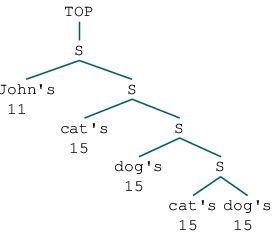

In [11]:
tree2, cats = iparse.parse_sentence("John's cat's dog's cat's dog's")
print(cats)
display(tree2)

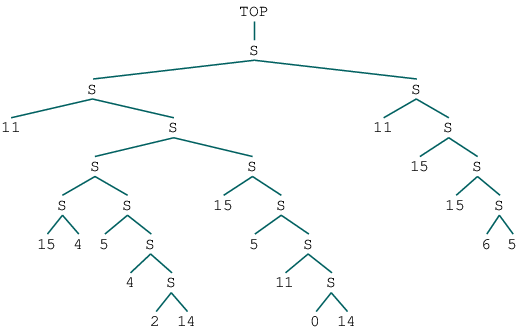

In [6]:
iparse.tree_from_cats(cats)

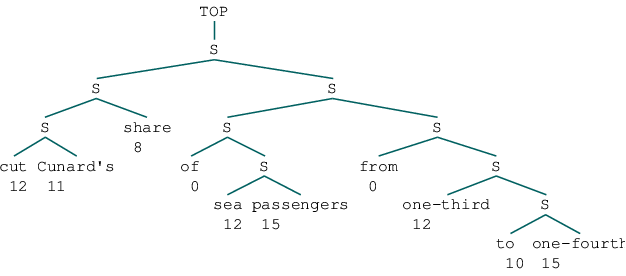

[5, 12, 11, 8, 0, 12, 15, 0, 12, 10, 15, 5]
[ 5  1 15 12  2 12 15  0  0 12 15  5]


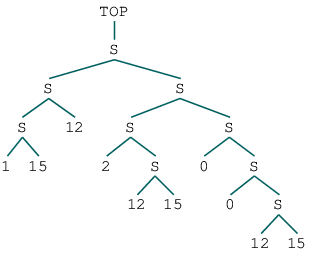

In [12]:
show_tree_and_pred("cut Cunard's share of sea passengers from one-third to one-fourth")

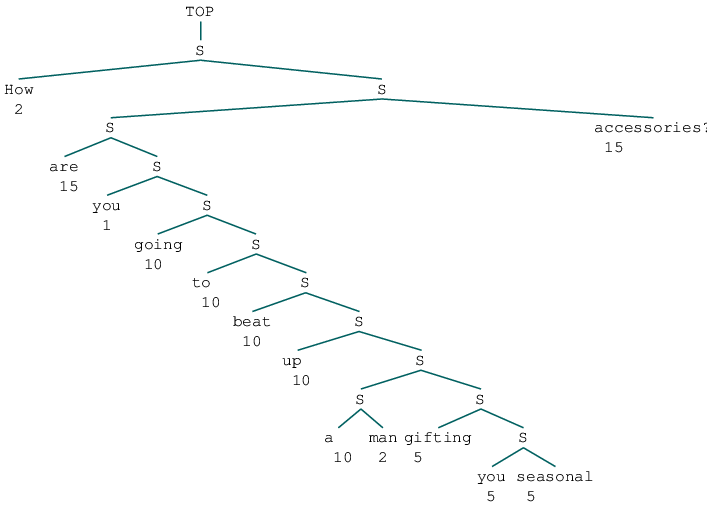

[7, 2, 15, 1, 10, 10, 10, 10, 10, 2, 5, 5, 5, 15, 7]
[ 7  2  7 10 10 10 10 10 10  2  5  5  2 15 15]


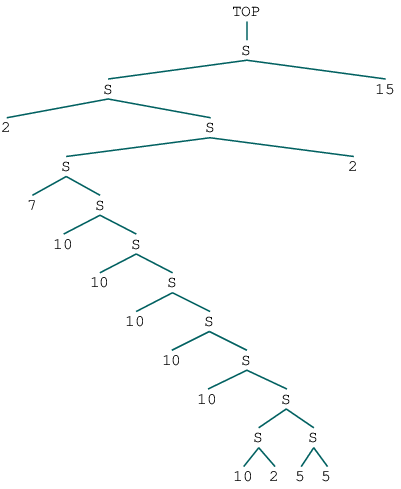

In [8]:
show_tree_and_pred("How are you going to beat up a man gifting you seasonal accessories?")

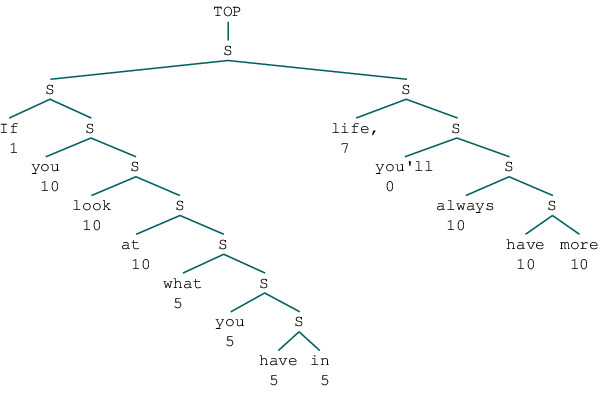

[8, 1, 10, 10, 10, 5, 5, 5, 5, 7, 0, 10, 10, 10, 8]
[ 5  2  7 15 10 10 10 10  2  7  7 15  0 14  5]


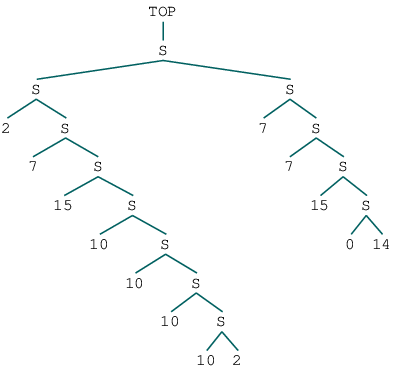

In [46]:
show_tree_and_pred("If you look at what you have in life, you'll always have more")

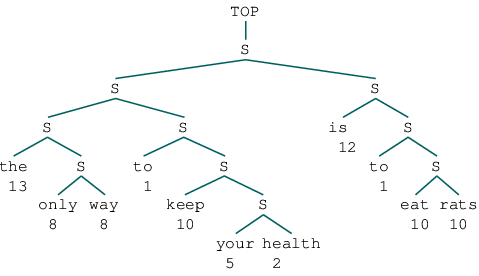

[8, 13, 8, 8, 1, 10, 5, 2, 12, 1, 10, 10, 8]
[ 5  2  8  8  0  1 10  2  7  7  8 14  5]


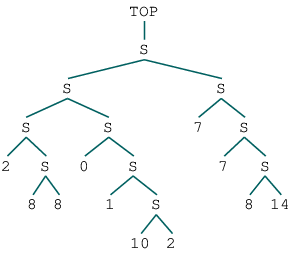

In [50]:
show_tree_and_pred("the only way to keep your health is to eat rats")

['On', 'the', 'one', 'hand', ',', 'the', 'Public', 'Health', 'Service', 'declared', 'as', 'recently', 'as', 'October', '26', 'that', 'present', 'radiation', 'levels', 'resulting', 'from', 'the', 'Soviet', 'shots', '``', 'do', 'not', 'warrant', 'undue', 'public', 'concern', "''", 'or', 'any', 'action', 'to', 'limit', 'the', 'intake', 'of', 'radioactive', 'substances', 'by', 'individuals', 'or', 'large', 'population', 'groups', 'anywhere', 'in', 'the', 'Aj', '.'] 53
54


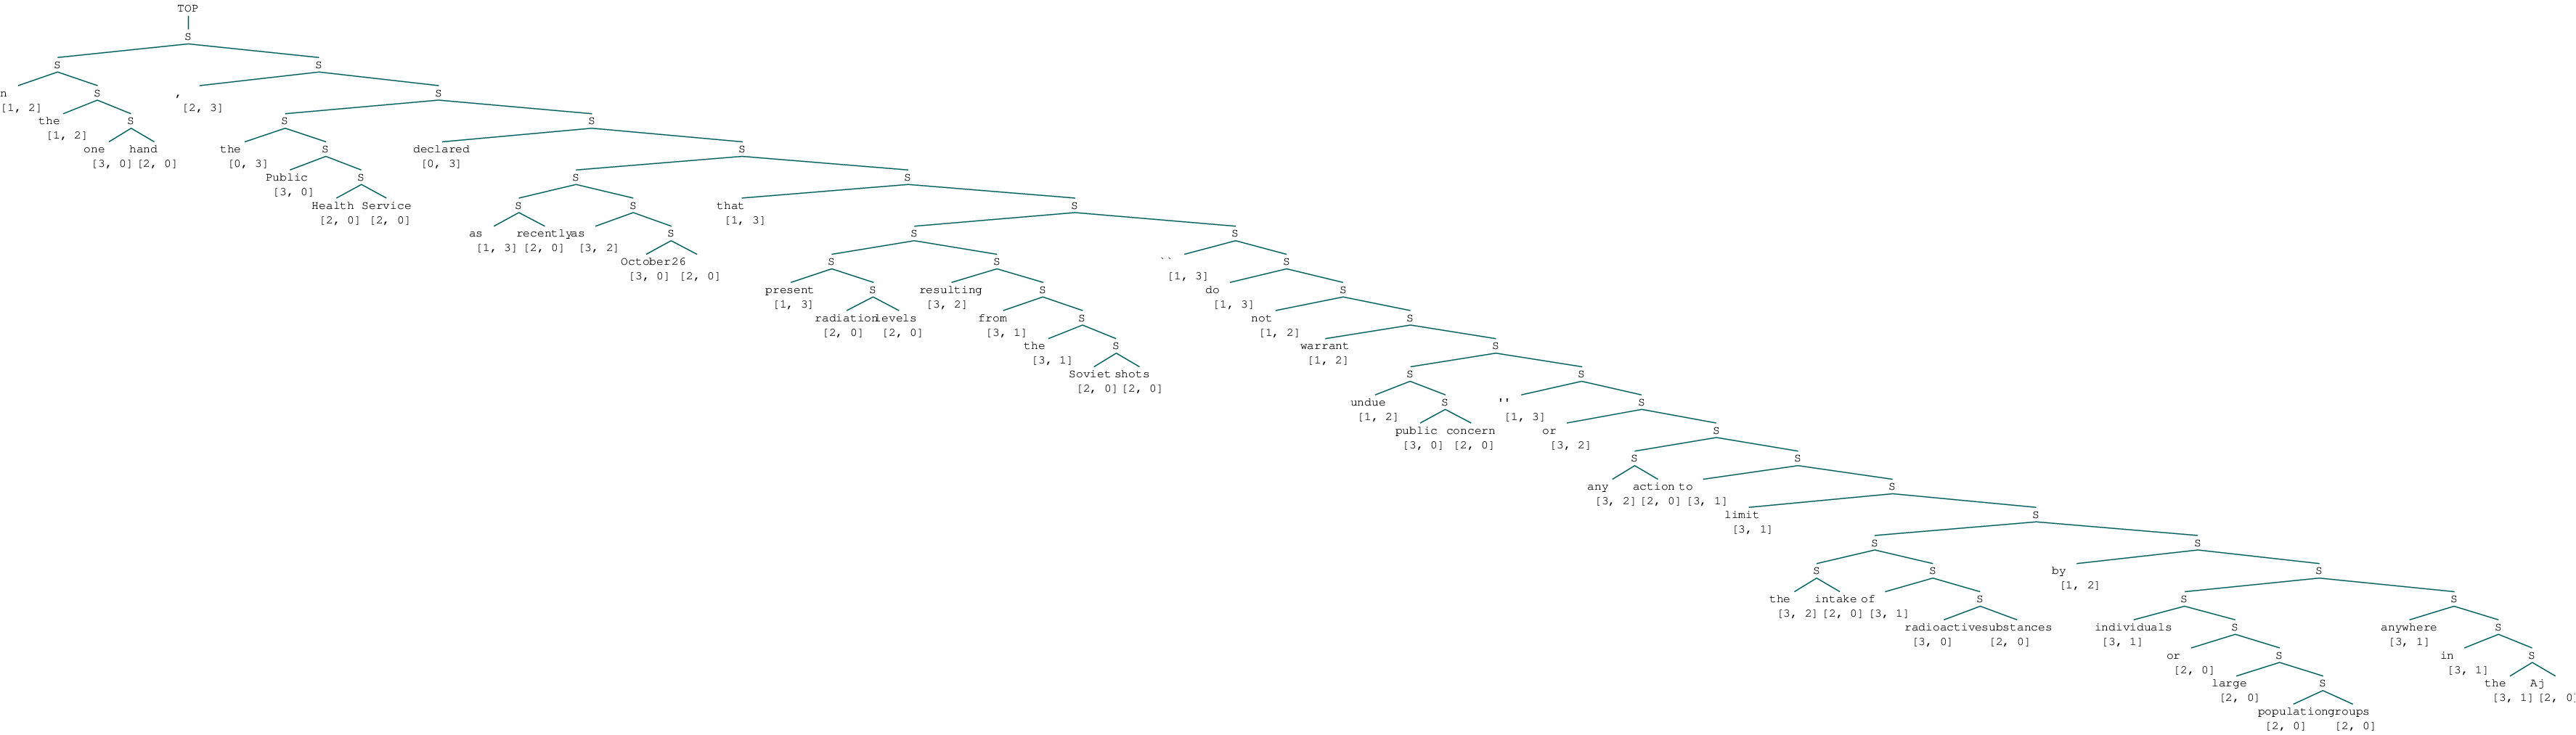

[[2, 0], [1, 2], [1, 2], [3, 0], [2, 0], [2, 3], [0, 3], [3, 0], [2, 0], [2, 0], [0, 3], [1, 3], [2, 0], [3, 2], [3, 0], [2, 0], [1, 3], [1, 3], [2, 0], [2, 0], [3, 2], [3, 1], [3, 1], [2, 0], [2, 0], [1, 3], [1, 3], [1, 2], [1, 2], [1, 2], [3, 0], [2, 0], [1, 3], [3, 2], [3, 2], [2, 0], [3, 1], [3, 1], [3, 2], [2, 0], [3, 1], [3, 0], [2, 0], [1, 2], [3, 1], [2, 0], [2, 0], [2, 0], [2, 0], [3, 1], [3, 1], [3, 1], [2, 0], [2, 0]]

['These', 'inwardly', 'dramatic', 'moments', 'showed', 'the', 'kind', 'of', '``', 'opera', 'style', "''", 'of', 'which', 'Beethoven', 'was', 'genuinely', 'capable', ',', 'but', 'which', 'did', 'not', 'take', 'so', 'kindly', 'to', 'the', 'mechanics', 'of', 'staging', '.'] 32
33


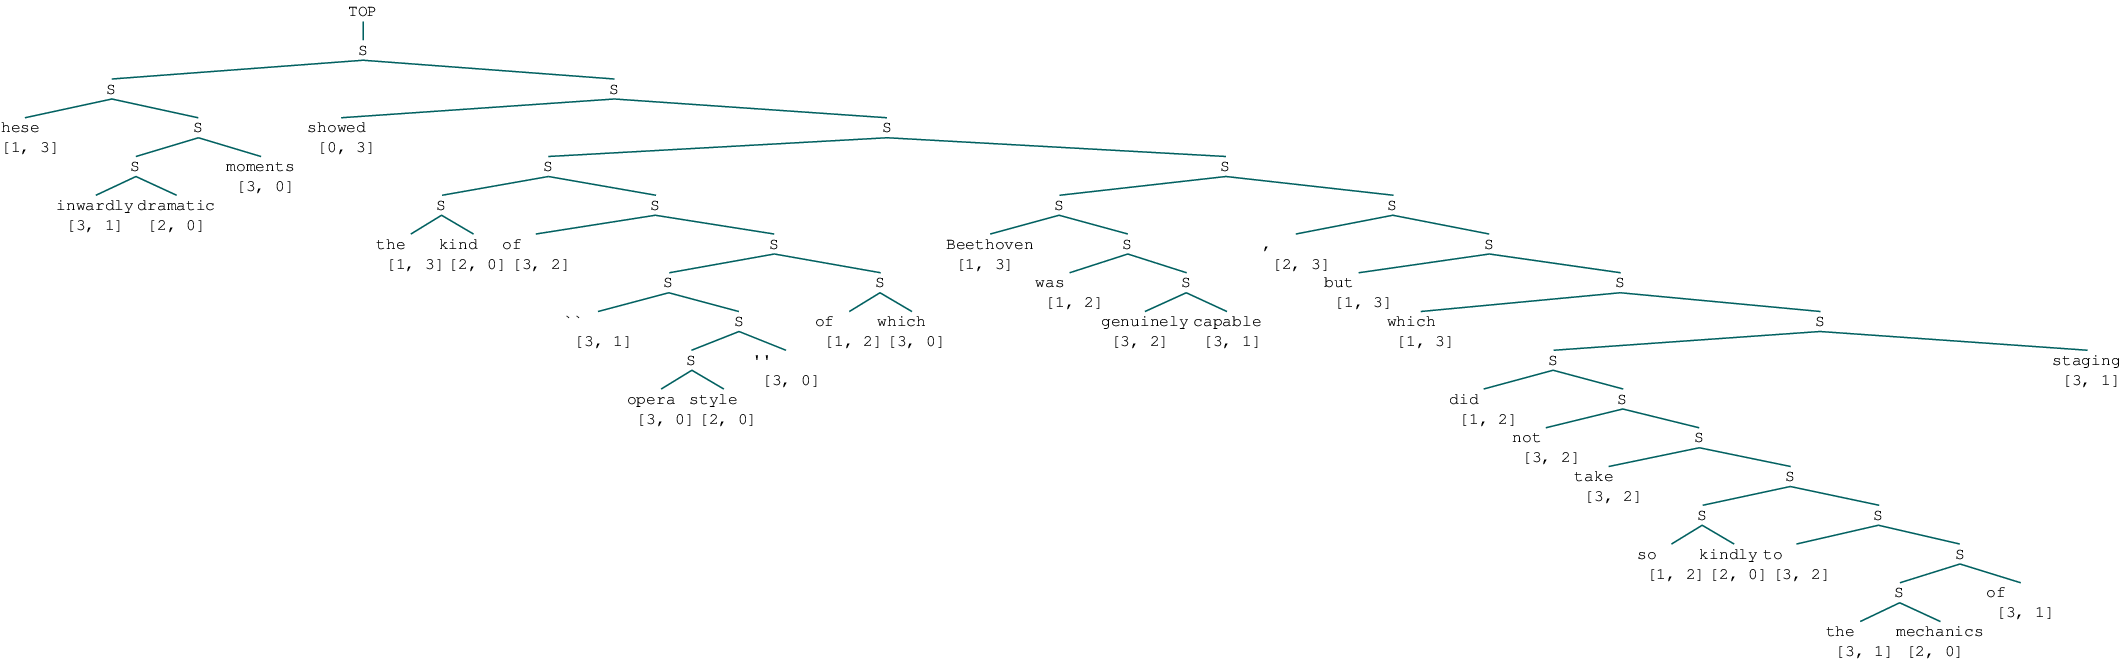

[[3, 1], [1, 3], [3, 1], [2, 0], [3, 0], [0, 3], [1, 3], [2, 0], [3, 2], [3, 1], [3, 0], [2, 0], [3, 0], [1, 2], [3, 0], [1, 3], [1, 2], [3, 2], [3, 1], [2, 3], [1, 3], [1, 3], [1, 2], [3, 2], [3, 2], [1, 2], [2, 0], [3, 2], [3, 1], [2, 0], [3, 1], [3, 1], [3, 1]]

['From', 'this', 'belief', 'is', 'derived', 'the', 'practical', 'orientation', 'of', 'our', 'policy', 'on', 'the', '``', 'uncommitted', "''", '(', '``', 'neutralist', "''", ',', '``', 'contested', "''", ')', 'nations', ',', 'especially', 'on', 'those', 'whose', 'leaders', 'make', 'the', 'most', 'noise', '--', 'Nehru', ',', 'Tito', ',', 'Nkrumah', ',', 'Sukarno', ',', 'Betancourt', ',', 'etc.', '.'] 49
50


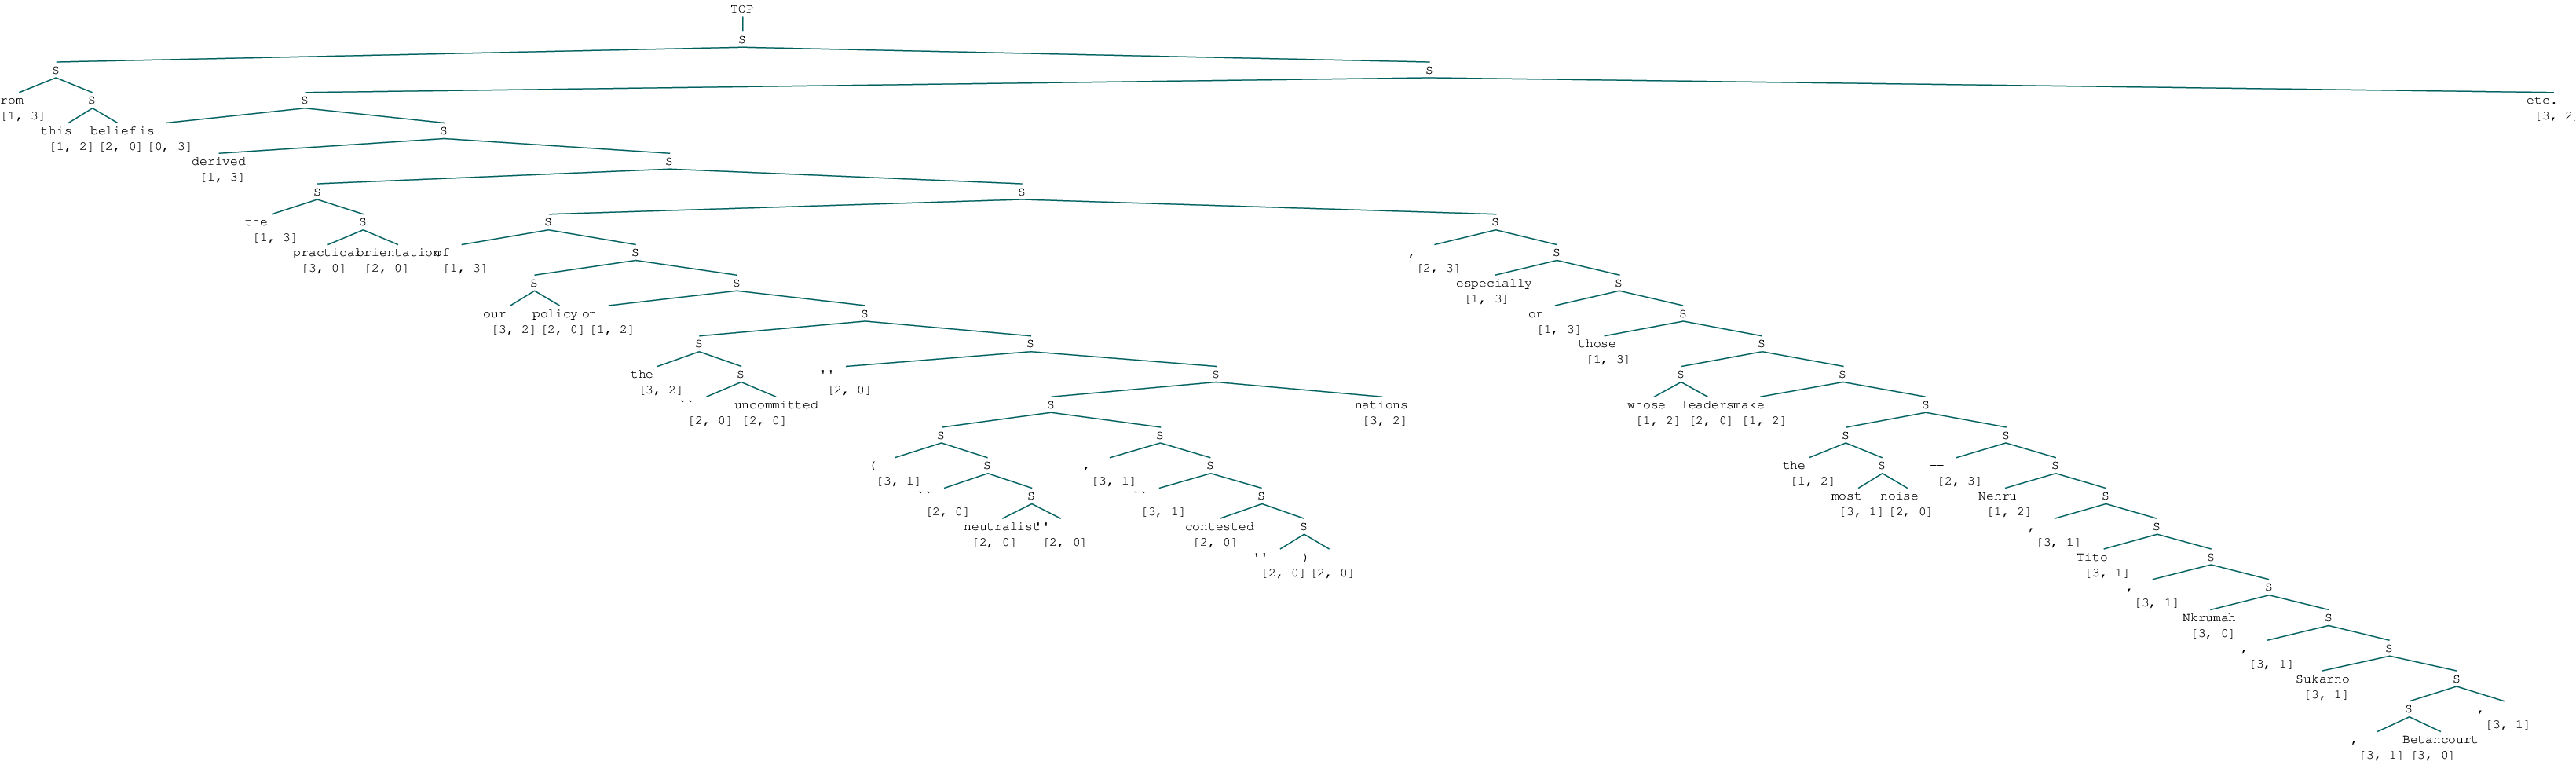

[[0, 3], [1, 3], [1, 2], [2, 0], [0, 3], [1, 3], [1, 3], [3, 0], [2, 0], [1, 3], [3, 2], [2, 0], [1, 2], [3, 2], [2, 0], [2, 0], [2, 0], [3, 1], [2, 0], [2, 0], [2, 0], [3, 1], [3, 1], [2, 0], [2, 0], [2, 0], [3, 2], [2, 3], [1, 3], [1, 3], [1, 3], [1, 2], [2, 0], [1, 2], [1, 2], [3, 1], [2, 0], [2, 3], [1, 2], [3, 1], [3, 1], [3, 1], [3, 0], [3, 1], [3, 1], [3, 1], [3, 0], [3, 1], [3, 2], [0, 3]]

['If', 'the', 'new', 'Soviet', 'series', 'has', 'followed', 'the', 'general', 'pattern', 'of', 'previous', 'Russian', 'tests', ',', 'the', 'shots', 'were', 'roughly', 'half', 'fission', 'and', 'half', 'fusion', ',', 'meaning', 'a', 'fission', 'yield', 'of', '30', 'to', '40', 'megatons', 'thus', 'far', '.'] 37
38


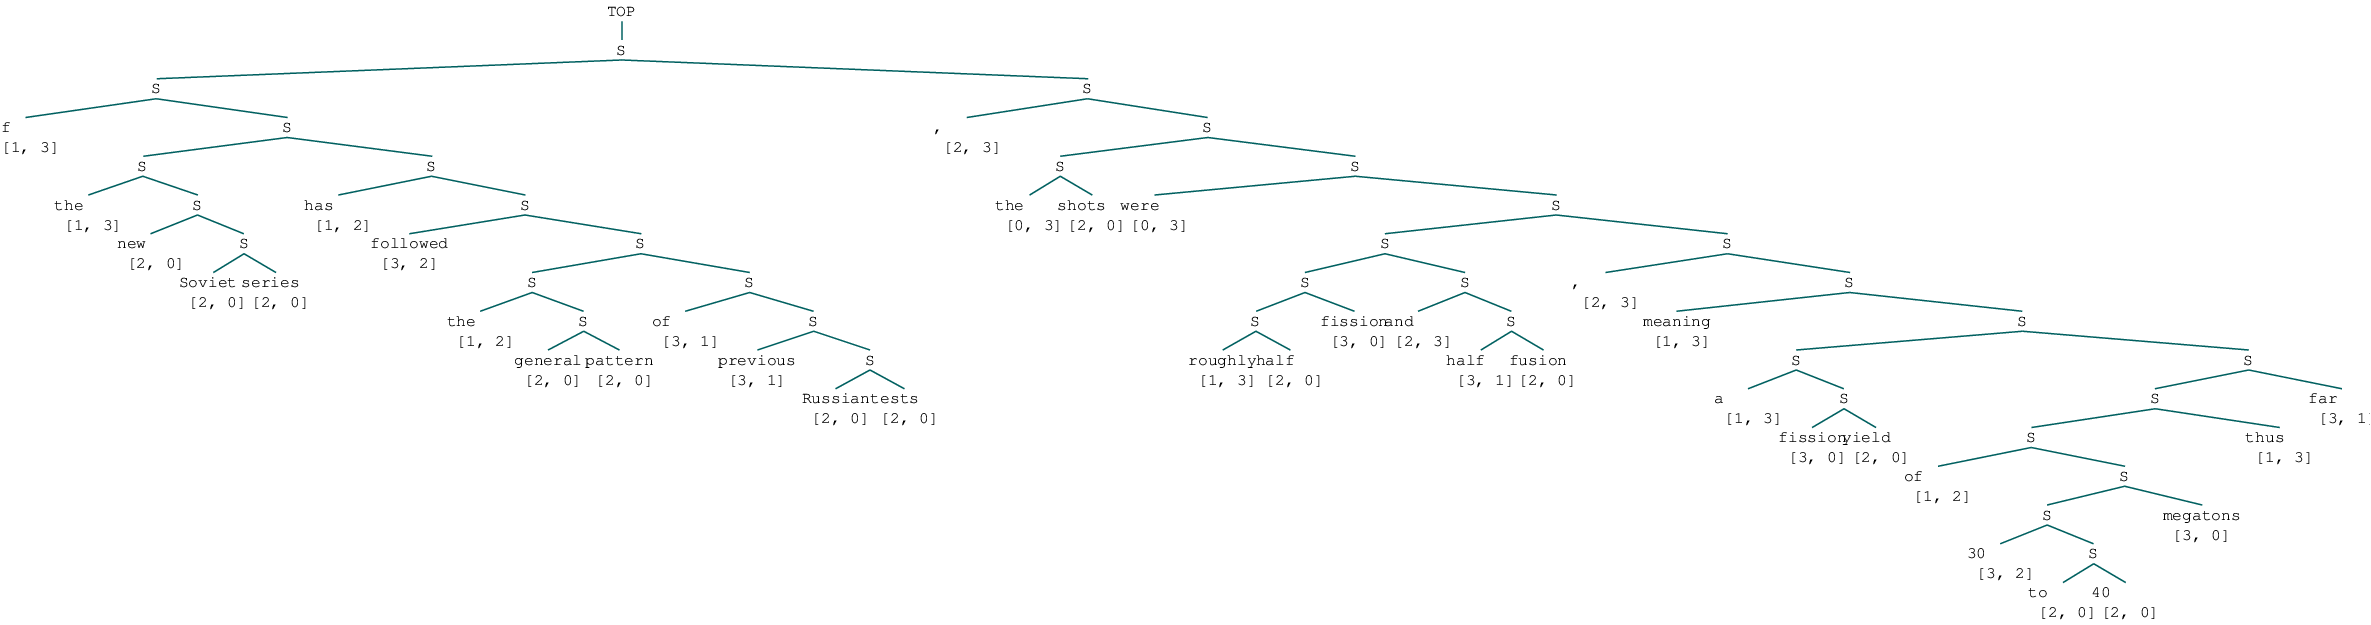

[[3, 1], [1, 3], [1, 3], [2, 0], [2, 0], [2, 0], [1, 2], [3, 2], [1, 2], [2, 0], [2, 0], [3, 1], [3, 1], [2, 0], [2, 0], [2, 3], [0, 3], [2, 0], [0, 3], [1, 3], [2, 0], [3, 0], [2, 3], [3, 1], [2, 0], [2, 3], [1, 3], [1, 3], [3, 0], [2, 0], [1, 2], [3, 2], [2, 0], [2, 0], [3, 0], [1, 3], [3, 1], [3, 1]]



In [9]:
from nltk.corpus import brown
brown_sents = brown.sents(categories=['editorial', 'reviews'])
size_brown = len(brown_sents)

for i in np.random.randint(size_brown, size=4):
    sent = brown_sents[i]
    print(sent, len(sent))
    tree, categories = iparse.parse_sentence(sent)
    print(len(categories))
#     for i, leafPos in enumerate(tree.treepositions('leaves')):
#         tree[leafPos] = categories[i+1]
    display(tree)
    print(categories, end='\n\n')

In [ ]:
from nltk.corpus import brown
brown_sents = brown.sents(categories=['editorial', 'reviews'])

counts = np.zeros(16)
print(len(brown_sents))
for sent in brown_sents: 
    try:
        tree, cats = iparse.parse_sentence(sent)
        cats = cats[1:-1]
        for c in cats:
            counts[c] += 1
    except:
        print(' '.join(sent))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(range(16))
ax.bar(langs,counts)
plt.show()